In [75]:
import pandas as pd 
import plotnine as plot
import statsmodels.formula.api as smf

In [45]:
dados=pd.read_json('https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202')

In [ ]:
dados_ipca=dados.rename(columns={'V':'ipca','D3C':'data'}).query('ipca not in ["Valor","..."]')

In [47]:
dados_ipca

,NC,NN,MC,MN,ipca,D1C,D1N,D2C,D2N,data,D3N
13,1,Brasil,2,%,99.25,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198012,dezembro 1980
14,1,Brasil,2,%,99.67,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198101,janeiro 1981
15,1,Brasil,2,%,103.07,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198102,fevereiro 1981
16,1,Brasil,2,%,101.03,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198103,março 1981
17,1,Brasil,2,%,103.27,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198104,abril 1981
...,...,...,...,...,...,...,...,...,...,...,...
535,1,Brasil,2,%,4.23,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202406,junho 2024
536,1,Brasil,2,%,4.50,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202407,julho 2024
537,1,Brasil,2,%,4.24,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202408,agosto 2024
538,1,Brasil,2,%,4.42,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202409,setembro 2024


In [54]:
dados_ipca['data']=pd.to_datetime(dados_ipca['data'],format="%Y%m")

In [55]:
dados_ipca['ipca']=dados_ipca['ipca'].astype(float)
dados_ipca=dados_ipca[['data','ipca']].query('data >= @pd.to_datetime("2004-01-01")').copy()
dados_ipca


,data,ipca
290,2004-01-01,7.71
291,2004-02-01,6.69
292,2004-03-01,5.89
293,2004-04-01,5.26
294,2004-05-01,5.15
...,...,...
535,2024-06-01,4.23
536,2024-07-01,4.50
537,2024-08-01,4.24
538,2024-09-01,4.42


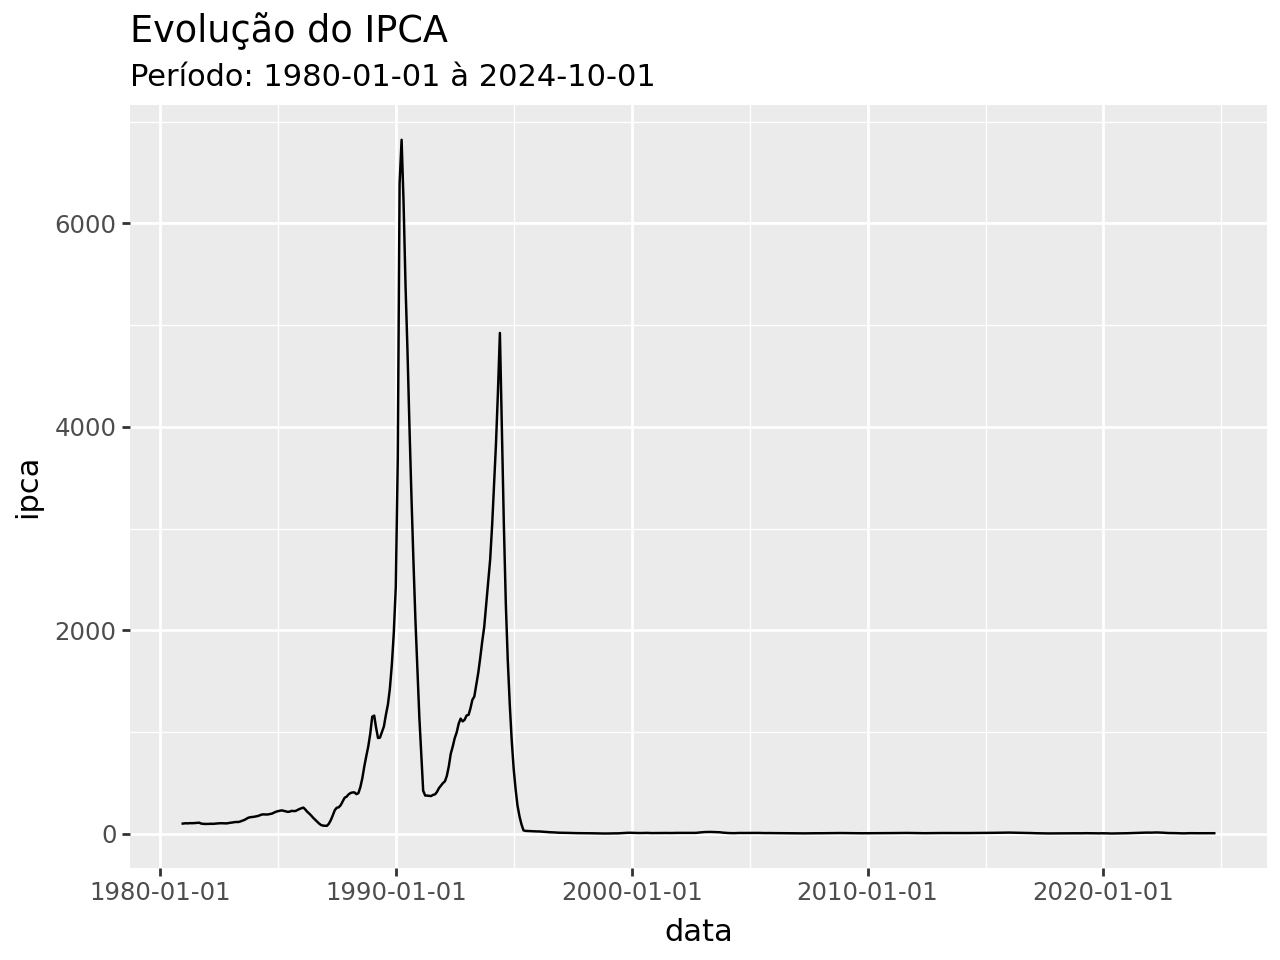

In [50]:
plot.ggplot(dados_ipca) +\
  plot.aes(x = 'data', y = 'ipca') +\
  plot.geom_line() +\
  plot.labs(
    title = "Evolução do IPCA",
    subtitle = "Período: 1980-01-01 à 2024-10-01",
    
    size = 16,
    color = "darkblue"
  )

In [51]:
import plotly.express as px

In [52]:
fig = px.line(dados_ipca, x='data', y='ipca', title='Evolução do IPCA',
              labels={'data':'Data', 'ipca':'IPCA'},
              )

fig.show()

In [60]:
desemprego=pd.read_json('https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201')
desemprego=desemprego.rename(columns={'V':'desemprego','D3C':'data'}).query('desemprego not in ["Valor","..."]')
desemprego

,NC,NN,MC,MN,desemprego,D1C,D1N,D2C,D2N,data,D3N
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
5,1,Brasil,2,%,7.5,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201207,mai-jun-jul 2012
...,...,...,...,...,...,...,...,...,...,...,...
147,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202405,mar-abr-mai 2024
148,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202406,abr-mai-jun 2024
149,1,Brasil,2,%,6.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202407,mai-jun-jul 2024
150,1,Brasil,2,%,6.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202408,jun-jul-ago 2024


In [65]:
desemprego=desemprego[['desemprego','data']]
desemprego['data']=pd.to_datetime(desemprego['data'],format='%Y%m')
desemprego['desemprego']=desemprego['desemprego'].astype(float)
desemprego=desemprego.query('data >= @pd.to_datetime("2004-01-01")').copy()
desemprego

,desemprego,data
1,8.0,2012-03-01
2,7.8,2012-04-01
3,7.7,2012-05-01
4,7.6,2012-06-01
5,7.5,2012-07-01
...,...,...
147,7.1,2024-05-01
148,6.9,2024-06-01
149,6.8,2024-07-01
150,6.6,2024-08-01


In [68]:
df=dados_ipca.set_index('data').join(other=desemprego.set_index('data'),how='inner')

In [69]:
df

,ipca,desemprego
data,,
2012-03-01,5.24,8.0
2012-04-01,5.10,7.8
2012-05-01,4.99,7.7
2012-06-01,4.92,7.6
2012-07-01,5.20,7.5
...,...,...
2024-05-01,3.93,7.1
2024-06-01,4.23,6.9
2024-07-01,4.50,6.8


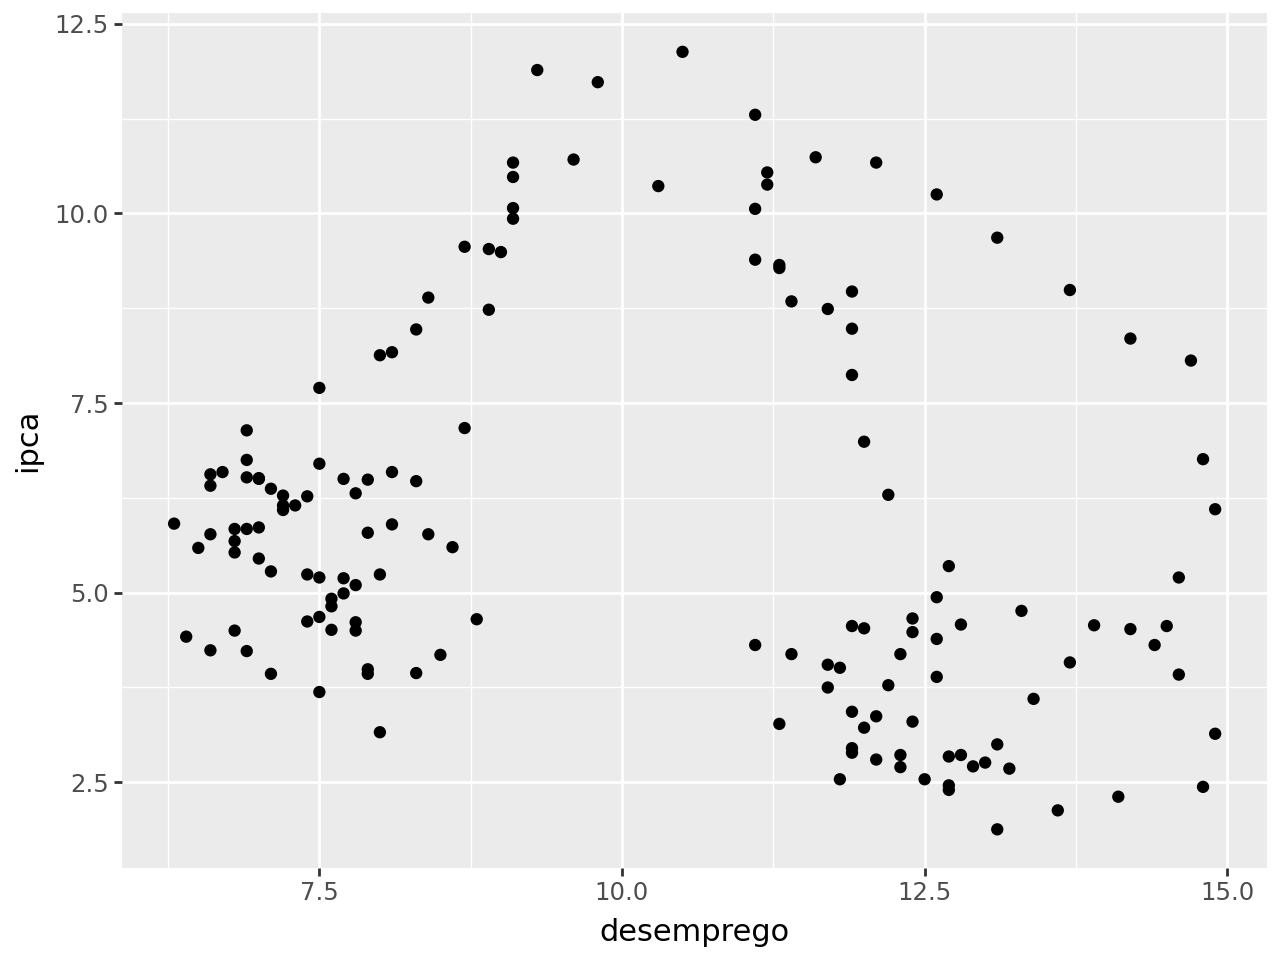

In [74]:
(plot.ggplot(df)+
plot.aes(x='desemprego',y='ipca')+
plot.geom_point())
    
    


In [ ]:
modelo=smf.ols('ipca ~ desemprego',data=df).fit()


In [82]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ipca   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.175
Date:                qua, 27 nov 2024   Prob (F-statistic):             0.0243
Time:                        08:36:20   Log-Likelihood:                -350.05
No. Observations:                 151   AIC:                             704.1
Df Residuals:                     149   BIC:                             710.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6615      0.802      9.551      0.0

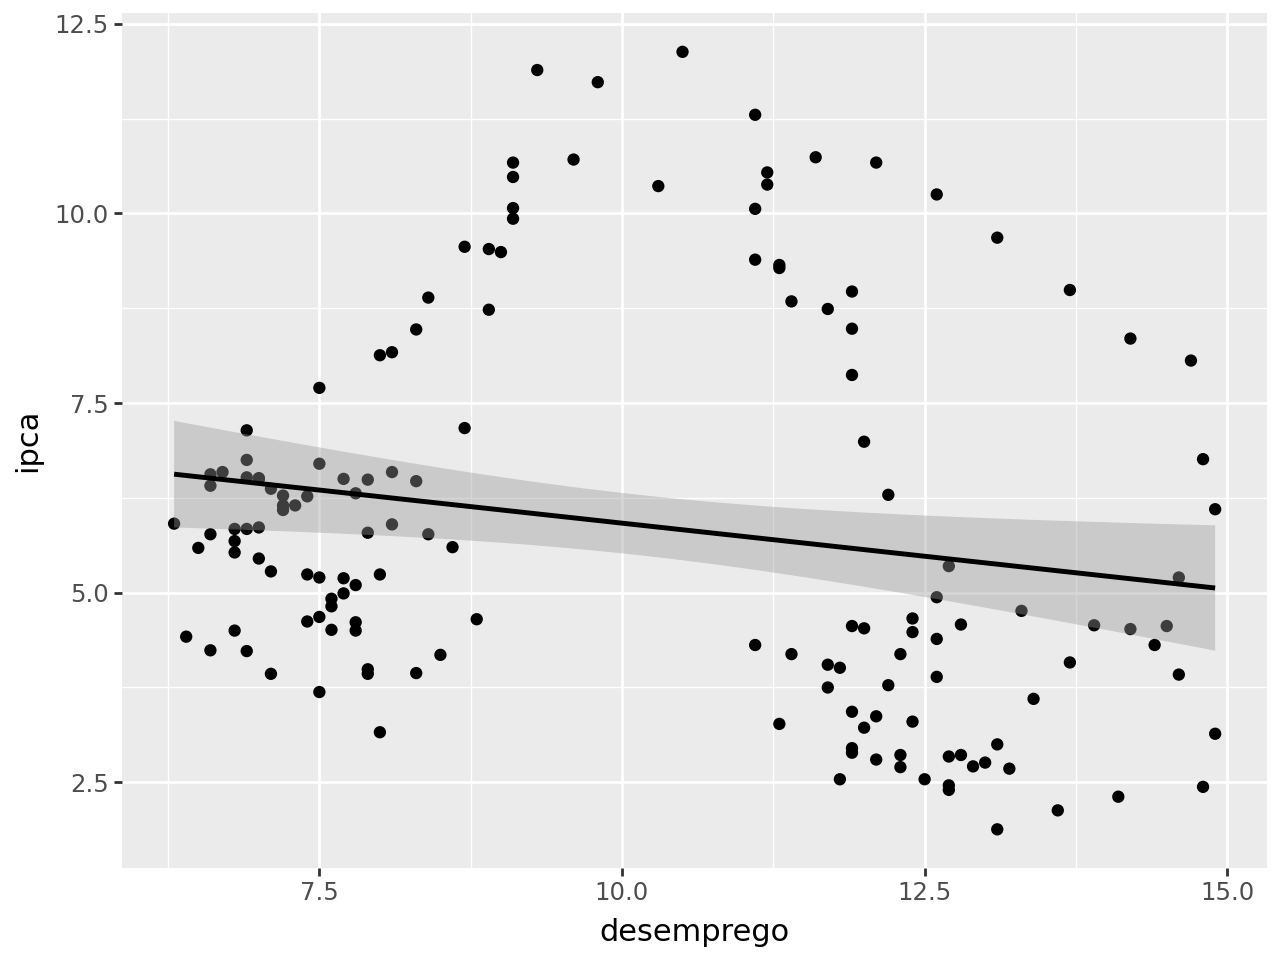

In [86]:
(plot.ggplot(df)+
plot.aes(x='desemprego',y='ipca')+
plot.geom_point()+
plot.geom_smooth(method='lm'))
